In [1]:
import pandas as pd

import matplotlib.pyplot as plt

import seaborn as sns

import statsmodels.formula.api as smf

from pickle import dump,load

import warnings
warnings.filterwarnings('ignore')

# Data Collection

In [2]:
at_data=pd.read_csv(r"D:\Data Science\Data sets\WC_AT.csv")
at_data.head(50)

,Waist,AT
0,74.75,25.72
1,72.60,25.89
2,81.80,42.60
3,83.95,42.80
4,74.65,29.84
5,71.85,21.68
6,80.90,29.08
7,83.40,32.98
8,63.50,11.44
9,73.20,32.22


#  Data Understanding

In [3]:
at_data.shape

(109, 2)

In [4]:
at_data.dtypes

Waist    float64
AT       float64
dtype: object

In [5]:
at_data.isna().sum()

Waist    0
AT       0
dtype: int64

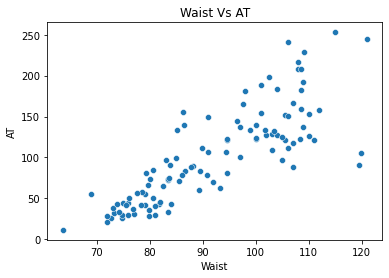

In [6]:
sns.scatterplot(x=at_data['Waist'],y=at_data['AT'])
plt.title('Waist Vs AT')
plt.show()

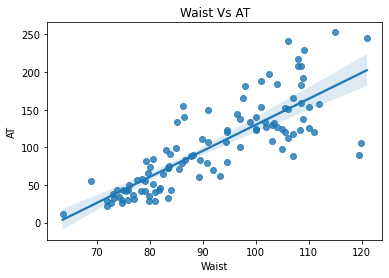

In [7]:
sns.regplot(x='Waist',y='AT',data=at_data)
plt.title('Waist Vs AT')
plt.show()

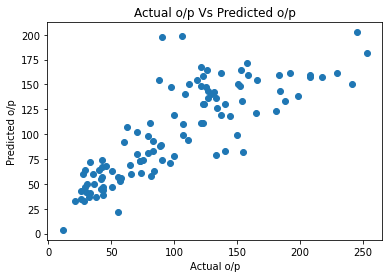

In [61]:
plt.scatter(x=actual_op,y=predicted_op)
plt.xlabel('Actual o/p')
plt.ylabel('Predicted o/p')
plt.title('Actual o/p Vs Predicted o/p')
plt.show()

### Fails linearity test

<AxesSubplot:xlabel='Waist', ylabel='Density'>

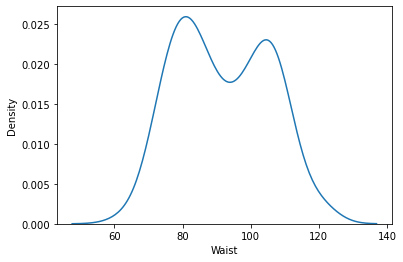

In [8]:
sns.distplot(at_data['Waist'],at_data['AT'],hist=False)

# Model Building &Training

In [9]:
linear_reg_model=smf.ols(formula='AT~Waist',data=at_data).fit()

In [10]:
linear_reg_model.params

Intercept   -215.981488
Waist          3.458859
dtype: float64

In [11]:
linear_reg_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     AT   R-squared:                       0.670
Model:                            OLS   Adj. R-squared:                  0.667
Method:                 Least Squares   F-statistic:                     217.3
Date:                Thu, 21 Jul 2022   Prob (F-statistic):           1.62e-27
Time:                        18:47:45   Log-Likelihood:                -534.99
No. Observations:                 109   AIC:                             1074.
Df Residuals:                     107   BIC:                             1079.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -215.9815     21.796     -9.909      0.000    -259.190    -172.773
Waist          3.4589      0.235     14.740      0.000       2.994       3.924
==============================================================================
Omnibus:                        3.960   Durbin-Watson:                   1.560
Prob(Omnibus):                  0.138   Jarque-Bera (JB):                4.596
Skew:                           0.104   Prob(JB):                        0.100
Kurtosis:                       3.984   Cond. No.                         639.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Model Testing

In [12]:
#y=mx+c

#for x=80
y=(3.46*80)-215.98
y                     # Approx = 29

60.82000000000002

In [13]:
29.08-(3.46*80.9)

-250.83400000000006

In [14]:
#for x=70
y=(3.46*70)-215.98
y

26.22

In [15]:
#for x=63.5
y=(3.46*63.5)-215.98
y                     # Actual = 11.44

3.730000000000018

In [16]:
#for x=107
y=(3.46*107)-215.98
y                     #Approx = 129

154.23999999999998

In [17]:
at_test=pd.DataFrame({'Waist':[70,80,63.5]})

In [18]:
linear_reg_model.predict(at_test)

0    26.138669
1    60.727263
2     3.656083
dtype: float64

# Model Evaluation

In [56]:
actual_op=at_data[['AT']]  #[['col']] is gives to get as df. orelse it will be in array format
actual_op.columns=['Actual o/p']
actual_inp=at_data[['Waist']]
#actual_inp.columns=['Actual i/p']
actual_inp.head()

,Waist
0,74.75
1,72.60
2,81.80
3,83.95
4,74.65


In [49]:
predicted_op=pd.DataFrame(linear_reg_model.predict(actual_inp))
predicted_op.columns=['Predicted o/p']
predicted_op

,Predicted o/p
0,42.568252
1,35.131704
2,66.953210
3,74.389758
4,42.222366
...,...
104,130.250337
105,106.730093
106,136.130398
107,157.229440


In [51]:
actual_op-predicted_op

,Actual o/p,Predicted o/p
0,NaN,NaN
1,NaN,NaN
2,NaN,NaN
3,NaN,NaN
4,NaN,NaN
...,...,...
104,NaN,NaN
105,NaN,NaN
106,NaN,NaN
107,NaN,NaN


In [33]:
actual_op.dtypes

AT    float64
dtype: object

In [40]:
df=pd.DataFrame({'Actual Output':at_data['AT'],'Predicted Output':linear_reg_model.predict(actual_inp)})
df

,Actual Output,Predicted Output
0,25.72,42.568252
1,25.89,35.131704
2,42.60,66.953210
3,42.80,74.389758
4,29.84,42.222366
...,...,...
104,124.00,130.250337
105,62.20,106.730093
106,133.00,136.130398
107,208.00,157.229440


In [41]:
df['Error']=df['Actual Output']-df['Predicted Output']
df

,Actual Output,Predicted Output,Error
0,25.72,42.568252,-16.848252
1,25.89,35.131704,-9.241704
2,42.60,66.953210,-24.353210
3,42.80,74.389758,-31.589758
4,29.84,42.222366,-12.382366
...,...,...,...
104,124.00,130.250337,-6.250337
105,62.20,106.730093,-44.530093
106,133.00,136.130398,-3.130398
107,208.00,157.229440,50.770560


In [52]:
error=df['Error']
error

0     -16.848252
1      -9.241704
2     -24.353210
3     -31.589758
4     -12.382366
         ...    
104    -6.250337
105   -44.530093
106    -3.130398
107    50.770560
108    48.695244
Name: Error, Length: 109, dtype: float64

# Homoscedasticity Check

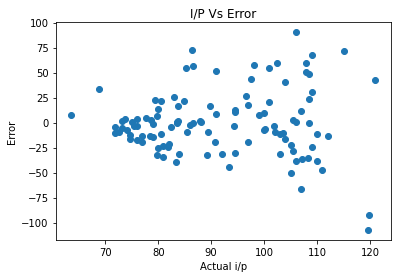

In [55]:
plt.scatter(x=actual_inp,y=error)
plt.xlabel('Actual i/p')
plt.ylabel('Error')
plt.title('I/P Vs Error')
plt.show()

# Zero Residual Mean

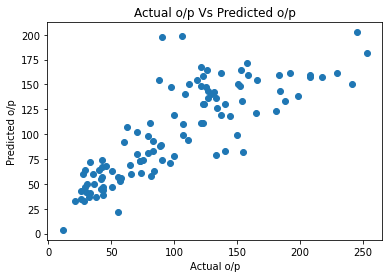

In [57]:
plt.scatter(x=actual_op,y=predicted_op)
plt.xlabel('Actual o/p')
plt.ylabel('Predicted o/p')
plt.title('Actual o/p Vs Predicted o/p')
plt.show()

In [59]:
actual_op

,Actual o/p
0,25.72
1,25.89
2,42.60
3,42.80
4,29.84
...,...
104,124.00
105,62.20
106,133.00
107,208.00


In [60]:
predicted_op

,Predicted o/p
0,42.568252
1,35.131704
2,66.953210
3,74.389758
4,42.222366
...,...
104,130.250337
105,106.730093
106,136.130398
107,157.229440


# Model Deployment

In [21]:
dump(linear_reg_model,open('Adipose_Tissue_Prediction','wb'))

In [22]:
at_loaded=load(open('Adipose_Tissue_Prediction','rb'))
at_loaded.predict(at_test)

0    26.138669
1    60.727263
2     3.656083
dtype: float64

In [23]:
import numpy as np
np.random.randn(10)

array([-0.86419823,  0.03969646, -0.06544849, -1.69319299, -0.44769572,
        0.40105295,  1.01636707,  0.96579891, -0.12641715,  0.44519039])

In [24]:
arr1=np.array([1,2,3,4,5])
arr1

array([1, 2, 3, 4, 5])

In [25]:
np.random.randn()

-0.22835406972566016

In [62]:
from sklearn.preprocessing import StandardScaler
std_scaler = StandardScaler()
std_scaler

StandardScaler()